## Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

El conjunto de datos consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve


In [ ]:
dataset = pd.read_csv("dataset/spambase.csv")
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


## Palabras más encontradas
¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común?

In [ ]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

melted = pd.melt(column_sum, id_vars=['spam'], var_name='word', value_name='frequence')

df_spam = melted.loc[melted['spam'] == 1]
df_not_spam = melted.loc[melted['spam'] == 0]

df_spam_s = df_spam.sort_values(by='frequence', ascending=False)
df_not_spam_s = df_not_spam.sort_values(by='frequence', ascending=False)

display(df_spam_s.head(10))
display(df_not_spam_s.head(10))



,spam,word,frequence
37,1,word_freq_you,4105599
41,1,word_freq_your,2502597
23,1,word_freq_will,997100
31,1,word_freq_free,939790
9,1,word_freq_our,931799
103,1,char_freq_!,931352
5,1,word_freq_all,732080
19,1,word_freq_mail,635470
35,1,word_freq_email,578759
33,1,word_freq_business,521250


,spam,word,frequence
36,0,word_freq_you,3541702
52,0,word_freq_george,3527559
48,0,word_freq_hp,2496576
22,0,word_freq_will,1495268
40,0,word_freq_your,1223098
50,0,word_freq_hpl,1204398
88,0,word_freq_re,1159138
90,0,word_freq_edu,800669
2,0,word_freq_address,681569
82,0,word_freq_meeting,604460


In [ ]:
# Sin considerar caracteres especiales (SOLO palabras)

df_spam_sw = df_spam_s[df_spam_s['word'].str.startswith('word_')]
df_not_spam_sw = df_not_spam_s[df_not_spam_s['word'].str.startswith('word_')]

display(df_spam_sw.head(10))
display(df_not_spam_sw.head(10))


,spam,word,frequence
37,1,word_freq_you,4105599
41,1,word_freq_your,2502597
23,1,word_freq_will,997100
31,1,word_freq_free,939790
9,1,word_freq_our,931799
5,1,word_freq_all,732080
19,1,word_freq_mail,635470
35,1,word_freq_email,578759
33,1,word_freq_business,521250
13,1,word_freq_remove,499309


,spam,word,frequence
36,0,word_freq_you,3541702
52,0,word_freq_george,3527559
48,0,word_freq_hp,2496576
22,0,word_freq_will,1495268
40,0,word_freq_your,1223098
50,0,word_freq_hpl,1204398
88,0,word_freq_re,1159138
90,0,word_freq_edu,800669
2,0,word_freq_address,681569
82,0,word_freq_meeting,604460


In [ ]:
spam_10 = set(df_spam_sw['word'].head(10))
not_spam_10 = set(df_not_spam_sw['word'].head(10))
words = spam_10.intersection(not_spam_10)

print()
print("Palabras más encontradas en correos con SPAM:")
for i in spam_10:
    print(i.split("_")[-1])

print()
print("Palabras más encontradas en correos No SPAM:")
for i in not_spam_10:
    print(i.split("_")[-1])

print()
print("Palabras en común:")
for i in words:
    print(i.split("_")[-1])


Palabras más encontradas en correos con SPAM:
will
free
our
your
business
remove
mail
email
all
you

Palabras más encontradas en correos No SPAM:
hp
will
re
edu
your
hpl
address
meeting
george
you

Palabras en común:
will
you
your


## Datasets de entrenamiento y evaluación
Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [ ]:
X = (dataset.drop(columns="spam") * 100).astype(int)
y = dataset["spam"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
958,0,0,0,0,0,0,121000,0,0,121000,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,133000,0,0,0,0,20800,0,41700,20800,0
654,33000,0,33000,0,0,0,66000,0,0,0,...,0,0,0,0,0,11600,0,40600,46400,34800
1497,52000,131000,26000,0,290000,26000,79000,26000,0,79000,...,0,0,0,0,0,13800,0,4600,0,0
3844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

958     1
1533    1
654     1
1497    1
3844    0
Name: spam, dtype: int64

In [ ]:
spam_count = dataset['spam'].value_counts()
total = spam_count.sum()
print(f'Proporción de SPAM: {spam_count[1] / total:.2%}')
print(f'Proporción de No SPAM: {spam_count[0] / total:.2%}')

Proporción de SPAM: 39.40%
Proporción de No SPAM: 60.60%


## Clasificador de Bayes ingenuo


In [ ]:
bayes = MultinomialNB()
bayes.fit(X_train, y_train)


MultinomialNB()

## Clasificador de Regresión Logística


In [ ]:
# Escalamiento de datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
# Entrenamiento
lregression = LogisticRegression(random_state = 42, class_weight="balanced")
lregression.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

## Matriz de confusión


In [ ]:
# Predicciones
y_pred_b = bayes.predict(X_test)
y_pred_lr = lregression.predict(X_test_scaled)


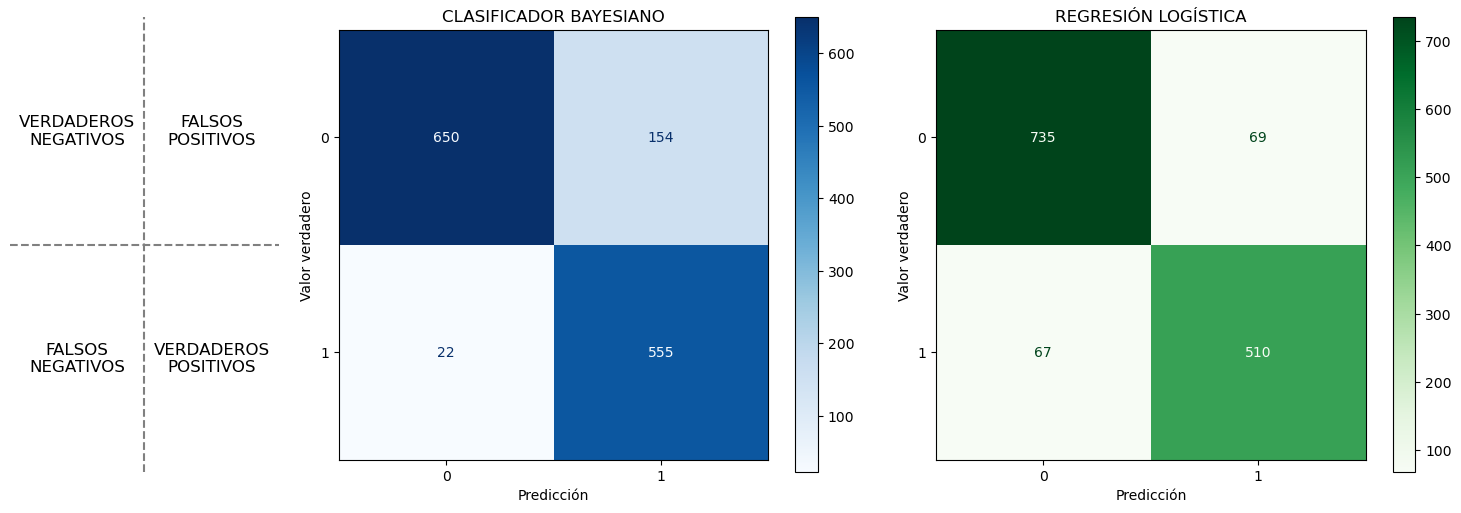

In [ ]:
# Matrices de confusión para cada modelo
cm_b = confusion_matrix(y_test, y_pred_b)
cm_lr = confusion_matrix(y_test, y_pred_lr)

g_cm_b = ConfusionMatrixDisplay(confusion_matrix=cm_b, display_labels=bayes.classes_)
g_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lregression.classes_)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2, 2]})

ax0.axvline(x=0.5, color='gray', linestyle='--')
ax0.axhline(y=0.5, color='gray', linestyle='--')
ax0.text(0.25, 0.75, 'VERDADEROS\nNEGATIVOS', fontsize=12, ha='center', va='center')
ax0.text(0.75, 0.75, 'FALSOS\nPOSITIVOS', fontsize=12, ha='center', va='center')
ax0.text(0.25, 0.25, 'FALSOS\nNEGATIVOS', fontsize=12, ha='center', va='center')
ax0.text(0.75, 0.25, 'VERDADEROS\nPOSITIVOS', fontsize=12, ha='center', va='center')
ax0.set_xlim(0, 1)
ax0.set_ylim(0, 1)
ax0.axis('off')

g_cm_b.plot(ax=ax1, cmap='Blues')
ax1.set_title("CLASIFICADOR BAYESIANO")
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Valor verdadero')

g_cm_lr.plot(ax=ax2, cmap='Greens')
ax2.set_title("REGRESIÓN LOGÍSTICA")
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Valor verdadero')

plt.tight_layout()
plt.show()

En conclusión, se observa que el Clasificador Bayesiano resulta en una gran cantidad de Falsos Positivos, lo que no es bueno para este tipo de problemas, porque estará clasificando como SPAM correos que en realidad no lo son.

La Regresión Logística, en cambio, tiene un mayor grado de balance entre Falsos Positivos y Falsos Negativos.

## Métricas


In [ ]:
metrics_data = [
    [f"{round(accuracy_score(y_test, y_pred_b)*100, 2)}%", f"{round(accuracy_score(y_test, y_pred_lr)*100, 2)}%"],
    [round(precision_score(y_test, y_pred_b, zero_division=0), 4), round(precision_score(y_test, y_pred_lr, zero_division=0), 4)],
    [round(recall_score(y_test, y_pred_b, zero_division=0), 4), round(recall_score(y_test, y_pred_lr, zero_division=0), 4)]
]

metrics = pd.DataFrame(metrics_data,
                       columns=['CLASIFICADOR BAYESIANO', 'REGRESION LOGISTICA'],
                       index=['Accuracy', 'Precision', 'Recall'])

display(metrics)


,CLASIFICADOR BAYESIANO,REGRESION LOGISTICA
Accuracy,87.26%,90.15%
Precision,0.7828,0.8808
Recall,0.9619,0.8839


* La Regresión Logística tiene mayor Precisión, significa que el modelo es bueno para predecir positivos cuando realmente lo son.  El Clasificador Bayesiano, en cambio, tiene menor precisión, es decir, predice con más frecuencia positivos de manera incorrecta.

* El Clasificador Bayesiano tiene mayor Recuperación, significa que puede encontrar la mayoría de los positivos.  La recuperación más baja, indica que la Regresión Logística deja en algunos casos positivos sin detectar.

Ambas conclusiones se pueden observar en las matrices de confusión del punto anterior.
- Menor Precisión => Mayor cantidad de falsos positivos.
- Menor Recuperación => Mayor cantidad de falsos negativos.

## ROC


In [ ]:
y_probs_b = bayes.predict_proba(X_test)[:, -1]
y_probs_lr = lregression.predict_proba(X_test_scaled)[:, -1]

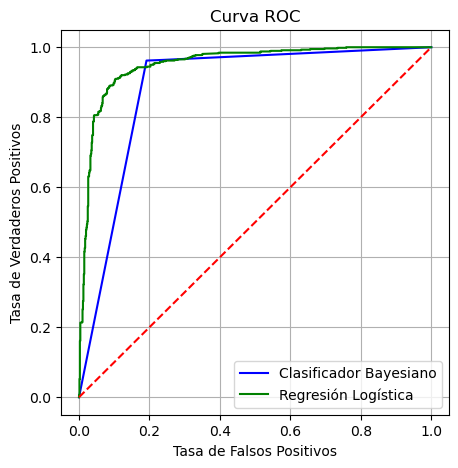

In [ ]:
fp_b, p_b, thresholds_b = roc_curve(y_test, y_probs_b)
fp_lr, p_lr, thresholds_lr = roc_curve(y_test, y_probs_lr)

plt.figure(figsize=(5, 5))
plt.plot(fp_b, p_b, color='blue', label="Clasificador Bayesiano")
plt.plot(fp_lr, p_lr, color='green', label="Regresión Logística")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
auc_b = auc(fp_b, p_b)
auc_lr = auc(fp_lr, p_lr)

print(f"AUC Clasificador Bayesiano = {auc_b}")
print(f"AUC Regresión Logística = {auc_lr}")

AUC Clasificador Bayesiano = 0.8850353949489985
AUC Regresión Logística = 0.9520001810703846


El Área bajo la curva ROC de la Regresión Logística es más cercana a 1, por lo que, implica que este modelo es mejor que el Clasificador Bayesiano para este problema, siendo capaz de distinguir mejor entre las instancias positivas y negativas de SPAM.